# Budget Planning Notebook

Cell below imports data libraries and creates new dataframe. **Do not change this cell**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.DataFrame()


## Salary Assesment Inputs:

 *This are the inputs for the first section of the program. This section calculates your salary and disposible income over your career and life. All inputs below are free to be updated but keep in mind the model is only as realistic as the inputs given. Some typical ranges for the inputs are provided below:*

In [10]:
current_age = 21
starting_wage = 60000
annual_raise = 0.02
promotion_raise = 0.1
years_to_promotion = 8
bonus_pct = 0.05
retirement_age = 65
pension_percent = 0.6
pension_raise = 0.02
death = 90

#### This cell calculates your total Salary over your carreer:

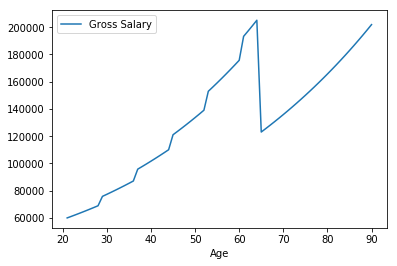

In [11]:
{
    
    "tags":[
        "hidecode",
        
          ]
}

age =list(range(current_age,death+1))
df['Age'] = age

annualSalary = [None]*len(age)

for i in range(len(annualSalary)):
    annualSalary[0]=starting_wage
    if i>0 and i<retirement_age-current_age:
        annualSalary[i] = annualSalary[i-1]*(1+annual_raise)
        if i%years_to_promotion == 0:
            annualSalary[i]=annualSalary[i-1]*(1+promotion_raise)
    elif i==retirement_age-current_age:
        annualSalary[i] = annualSalary[i-1]*pension_percent
    elif i>retirement_age-current_age:
        annualSalary[i] = annualSalary[i-1]*(1+pension_raise)
        
df['Gross Salary'] = annualSalary

df.plot(x='Age',y='Gross Salary')

  


#### This cell calculates your annual bonus based off the given bonus percentage

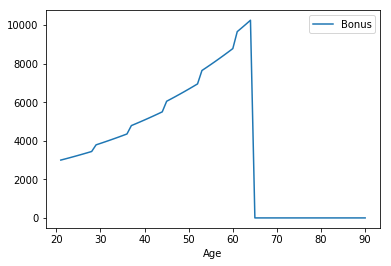

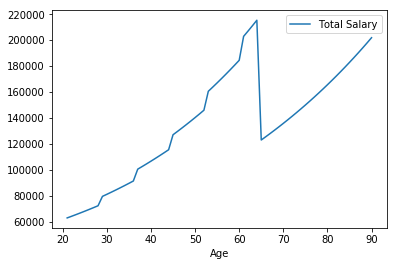

In [40]:
bonus= [None]*len(age)
for i in range(len(bonus)):
    if i<retirement_age-current_age:
        bonus[i]=annualSalary[i]*bonus_pct
    elif i>=retirement_age-current_age:
        bonus[i]=0
        
df['Bonus']=bonus
df['Total Salary'] = df['Gross Salary']+df['Bonus']

df.plot(x='Age',y='Bonus')
df.plot(x='Age',y='Total Salary')

#### This cell calculates the annual tax you will pay based on your salary

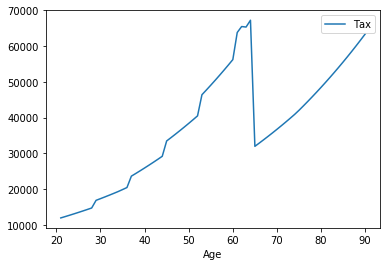

In [34]:
taxp = [None]*len(age)
taxf = [None]*len(age)
tax = [None]*len(age)
tbt = df['Total Salary'].tolist()

p1 = 10582; p2 = 43906; p3 = 87813 ;p4 = 150000; p5 = 220000
pr1 = 0; pr2 = 0.0505; pr3 = 0.0915; pr4 = 0.1116; pr5 = 0.1216; pr6 = 0.1316
f1 = 12069; f2 = 47630; f3 = 95259; f4 = 147667; f5 = 210371; 
fr1 = 0; fr2 = 0.15; fr3 = 0.2050; fr4 = 0.26; fr5 = 0.29; fr6 = 0.33

for i in range(len(tbt)):
    if tbt[i]>=0:
        taxp[i] = (tbt[i]*pr1)
    if tbt[i] >= p1:
        taxp[i] = (p1*pr1)+((tbt[i]-p1)*pr2)
    if tbt[i] >= p2:
        taxp[i] = (p1*pr1)+((p2-p1)*pr2)+((tbt[i]-p2)*pr3)
    if tbt[i] >= p3:
        taxp[i] = (p1*pr1)+((p2-p1)*pr2)+((p3-p2)*pr3)+((tbt[i]-p3)*pr4)
    if tbt[i] >= p4:
         taxp[i] = (p1*pr1)+((p2-p1)*pr2)+((p3-p2)*pr3)+((p4-p3)*pr4)+((tbt[i]-p4)*pr5)
    if tbt[i] >= p5:
        taxp[i] = (p1*pr1)+((p2-p1)*pr2)+((p3-p2)*pr3)+((p4-p3)*pr4)+((p5-p4)*pr4)+((tbt[i]-p5)*pr6)

    if tbt[i]>=0:
        taxf[i] = (tbt[i]*fr1) 
    if tbt[i] >= f1:
        taxf[i] = (f1*fr1)+((tbt[i]-f1)*fr2)
    if tbt[i] >= f2:
        taxf[i] = (f1*fr1)+((f2-f1)*fr2)+((tbt[i]-f2)*fr3)
    if tbt[i] >= f3:
        taxf[i] = (f1*fr1)+((f2-f1)*fr2)+((f3-f2)*fr3)+((tbt[i]-f3)*fr4)
    if tbt[i] >= f4:
        taxf[i] = (f1*fr1)+((f2-f1)*fr2)+((f3-f2)*fr3)+((f4-f3)*fr4)+((tbt[i]-f4)*fr5)
    if tbt[i] >= f5:
        taxf[i] = (f1*fr1)+((f2-f1)*fr2)+((f3-f2)*fr3)+((f4-f3)*fr4)+((f5-f4)*fr4)+((tbt[i]-f5)*fr6)
        
    tax[i] = taxp[i] + taxf[i]
    
df['Tax'] = tax
df.plot(x='Age',y='Tax')

    
    

#### This cell calculates your annual disposable 

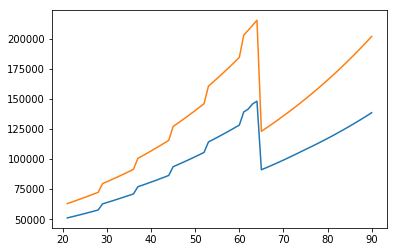

In [41]:
df['Disposable Income'] = df['Total Salary']-df['Tax']

plt.figure()
x = df['Age']
y1 = df['Disposable Income']
y2 = df['Total Salary']

plt.plot(x,y1)
plt.plot(x,y2)

## Allocation of Disposible Income

#### This section you will select how you would like to allocate your disposable income to your various expenses. Feel free to tweak the values but you will not want to deviate greatly from the recomended allocation

Feel free to change the columns to best reflect your spending habbits but make sure the total of all accounts adds up to 1

In [ ]:
##Spending accounts
short_term_savings_d = 
long_term_savings_d =
rent = 
utilities =
transportation =
food =
clothing = 
entertainment =
subscriptions =
personal =

### Minumum and maximum account balances

Sometimes an exact percentage of your income is not the best way to reflect your spending. To set mandatory minimums and maximums use the variables below

## Savings and Investments Allocation